In [1]:
import numpy as np
import random as rn

from matplotlib import pyplot as plt
from pprint import pprint as pp
from math import floor

In [67]:
### GA
POPULATION_SIZE = 6
CHROMESOME_SIZE = 4
MUTATION_RATE = 0.01  # Usually between  0.001 and 0.01.
CROSSOVER_RATE = 0.7
EPOCHS = 200
# PROMOTION_RATE = POPULATION_SIZE * 0.25
# STANDARD_FITNESS = 0.01
CHOICES_TEST = [0,1]

class Chromosome:

    def __init__(self, size, chromosome = []):
        self.size = size
        if len(chromosome) > 0:
            self.chromosome = chromosome
        else: 
            self.chromosome = self.random_binary_chromosome(size)

    def fitness(self):
        return self.fitness_test()
    
    def fitness_test(self):
        a = self.chromosome
        x = 8 * a[0] + 4 * a[1] + 2 * a[2] + 1 * a[3]
        return  15*x - x**2
    
#     def fitness_test(self):
#         a = self.chromosome
#         x = 8 * a[0] + 4 * a[1] + 2 * a[2] + 1 * a[3]
#         return  15*x - x**2

    def crossover(self, other, x):
        n1 = np.concatenate((self.chromosome[:x], other.chromosome[x:]))
        n2 = np.concatenate((other.chromosome[:x], self.chromosome[x:]))
        return Chromosome(self.size, n1), Chromosome(self.size, n2)

    def mutate(self, i):
        choices = CHOICES_TEST[:]
        choices.remove(self.chromosome[i])
        self.chromosome[i] = rn.choice(choices)
        
    def random_binary_chromosome(self, size):
        return np.array([rn.choice(CHOICES_TEST) for i in range(size)])
    
class Genetic:
    # 1 Initial population
    def initial_population(self):
        self.population = [Chromosome(CHROMESOME_SIZE) for i in range(POPULATION_SIZE)]

    # 2 Fitness function


    # 3 Selection
    def selection(self):
        total = 0
        wheel= []
        for chrom in self.population:
            total += chrom.fitness()
#             print('chromosome: ', chrom.chromosome)
#             print('fitess: ', chrom.fitness()) 
            wheel.append(total)

#         wheel = [total += chrom.fitness() for chrom in self.population]
        assert total > 0, 'total is not > 0' 
        
        candidates = []
        for dc in range(len(self.population)):
            prev = 0
            r = rn.uniform(0, total)
            for i in range(len(wheel)):
                if prev <= r and r <= wheel[i]:
                    candidates.append(self.population[i])
                    break
                prev = wheel[i]
                
#         print('selction')
#         pp(len(self.population))
#         pp(len(candidates))
        return self.crossover_and_mutate(candidates)

    def crossover_and_mutate(self, candidates):
        # 4 Crossover
        new_population = []
        for i in range(floor(len(candidates)/2)):
            if rn.random() < CROSSOVER_RATE:
                x = rn.randint(1, CHROMESOME_SIZE - 1)
                new_population.extend(candidates[2*i].crossover(candidates[2*i + 1], x))
            else:
                new_population.append(candidates[2*i])
                new_population.append(candidates[2*i+1])

        # 5 Mutation
        total_genes = CHROMESOME_SIZE * POPULATION_SIZE
        nr_of_mutations = int(round(total_genes * MUTATION_RATE))
        for _ in range(nr_of_mutations):
            r = rn.randint(0, total_genes - 1)
            chrom_index = floor(r / CHROMESOME_SIZE)
            gene_index = r % CHROMESOME_SIZE
            a = new_population[chrom_index]
            a.mutate(gene_index)
        
#         print('mating')
#         pp(len(self.population))
#         pp(len(new_population))
        self.population = new_population
        return new_population

    def chromString(self, arr):
        for i in arr:
            print(i.toString())

    def find_best(self):
        best_fitness = 0
        best_chrom = None
        for chrom in self.population:
            chrom_fitness = chrom.fitness() 
            if chrom_fitness > best_fitness:
                best_fitness = chrom_fitness
                best_chrom = chrom
        return best_chrom
    
    def average_fitness(self, chromosomes):
        return np.mean([i.fitness() for i in chromosomes])
    
    def approximate(self, epochs=32):
#         evolution = [self.selection() for _ in range(epochs)]
        evolution = []
        counter = 0
        for _ in range(epochs):
            counter += 1
            evolution.append(self.selection())
            print('\r Epoch: {}/{}'.format(counter, epochs), end='')
        return self.find_best(), evolution

 Epoch: 32/32

Text(0,0.5,'population fitness')

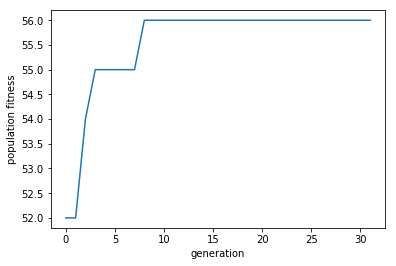

In [81]:
# Plot mean fitness over epochs
gen = Genetic()
gen.initial_population()
best, evo = gen.approximate()
plt.plot([gen.average_fitness(pop) for pop in evo])
plt.xlabel(s='generation')
plt.ylabel(s='population fitness')

[0, 14, 26, 36, 44, 50, 54, 56, 56, 54, 50, 44, 36, 26, 14]

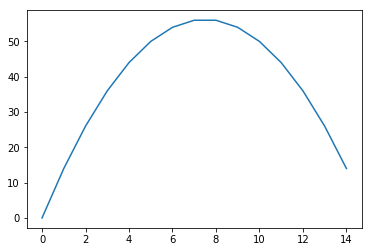

In [83]:
# Function that we are trying to optimize
x = 3
15*x - x**2
l = [15*x - x**2 for x in range(15)]
plt.plot(l)
l